In [98]:
import geopandas as gpd
from pyproj import Proj, transform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

In [99]:
# df = pd.read_fwf('SUEWS_SiteSelect_sorted.txt')
# df.columns=df.iloc[0]
# df=df.reindex(df.index.drop(0))
# df.drop(df.tail(2).index,inplace=True)
# df= df.astype(float)
# lat=df['lat']
# lon=df['lng']

In [100]:
# df = pd.read_csv('SUEWS_SiteSelect_v2017_2m_wall_limit.txt',sep='\t')
# df.columns=df.iloc[0]
# df=df.reindex(df.index.drop(0))
# df.drop(df.tail(2).index,inplace=True)
# df= df.astype(float)
# lat=df['lat']
# lon=df['lng']

In [101]:
df = pd.read_csv('SUEWS_SiteSelect.txt',sep='\t')
df.columns=df.iloc[0]
df=df.drop(df.index[0])
df.drop(df.tail(2).index,inplace=True)
df= df.astype(float)
lat=df['lat']
lon=df['lng']

/anaconda3/envs/fiona_problem/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
df.head()

,,"(Grid, Year, StartDLS)",EndDLS,lat,lng,SurfaceArea,Alt,id,ih,imin,Fr_Paved,Fr_Bldgs,...,Fr_ESTMClass_Bldgs5,Code_ESTMClass_Bldgs1,Code_ESTMClass_Bldgs2,Code_ESTMClass_Bldgs3,Code_ESTMClass_Bldgs4,Code_ESTMClass_Bldgs5,!,Site,Reference,nan
13203,2015,85,302.0,51.2844,0.108142,1.0,0.0,1.0,0.0,0.0,0.581000,0.0,...,0.0,801.0,803.0,8021.0,8022.0,8041.0,NaN,NaN,NaN,NaN
13366,2015,85,302.0,51.2844,0.106710,1.0,0.0,1.0,0.0,0.0,0.885000,0.0,...,0.0,801.0,803.0,8021.0,8022.0,8041.0,NaN,NaN,NaN,NaN
13376,2015,85,302.0,51.2937,0.120468,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,801.0,803.0,8021.0,8022.0,8041.0,NaN,NaN,NaN,NaN
13530,2015,85,302.0,51.2843,0.105278,1.0,0.0,1.0,0.0,0.0,0.387000,0.0,...,0.0,801.0,803.0,8021.0,8022.0,8041.0,NaN,NaN,NaN,NaN
13539,2015,85,302.0,51.2927,0.117660,1.0,0.0,1.0,0.0,0.0,0.022022,0.0,...,0.0,801.0,803.0,8021.0,8022.0,8041.0,NaN,NaN,NaN,NaN


In [103]:
# p2_text='''
# +units=m +init=ESRI:102009 +proj=lcc +lat_1=30 +lat_2=60 +lat_0=51.51 +lon_0=0.13 
# +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +no_defs +towgs84=0,0,0
# '''

p2_text='''
+units=m +init=ESRI:102009 +proj=lcc +lat_1=30 +lat_2=60 +lat_0=51.51 +lon_0=-0.96 
+x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +no_defs +towgs84=0,0,0
'''

p1 = Proj(init='epsg:32631')
p2 = Proj(p2_text)
x1, y1 = p1(list(lon),list(lat))
x2, y2 = transform(p1,p2,x1,y1)

In [104]:
x_file='wrfinput_d03.suews'
ds_base = xr.open_dataset(x_file)
wrf_LAT=ds_base.XLAT.values[0,:,:]
wrf_LON=ds_base.XLONG.values[0,:,:]


wrf_X,wrf_Y=p2(wrf_LON,wrf_LAT)

In [105]:
def pc_plot(grid_x, grid_y,new_Z,name):
    plt.figure(figsize=(10,10))
    plt.pcolor(grid_x, grid_y,new_Z)
    plt.colorbar()
    plt.title(name)
    plt.ylabel('y')
    plt.xlabel('x')
    

In [106]:
def regrid_lower(name):
    Z=df[name]
    grid_x=wrf_X
    grid_y=wrf_Y
    new_Z=griddata(list(zip(x2,y2)), Z.values, (grid_x, grid_y), method='linear')
    #pc_plot(grid_x, grid_y,new_Z,name)
    return grid_x, grid_y,new_Z

In [107]:
names=['H_Bldgs','H_EveTr','H_DecTr']
names_wrf=['bldgH_SUEWS','EveTreeH_SUEWS','DecTreeH_SUEWS']

for name,name_wrf in zip(names,names_wrf):
    print(name)
    grid_x, grid_y,new_0=regrid_lower(name)
    #new_all.update( {name : new_0} )
    ds_var=ds_base[name_wrf.upper()].values[0,:,:]
    ds_var[~np.isnan(new_0)]=new_0[~np.isnan(new_0)]
    zz=ds_base[name_wrf.upper()].values[0,:,:]
    zz[zz<0]=0
    zz[np.isnan(new_0) & (zz!=0)]=np.mean(zz[~np.isnan(new_0)])
    ds_base[name_wrf.upper()].values[0,:,:]=zz

H_Bldgs
H_EveTr
H_DecTr


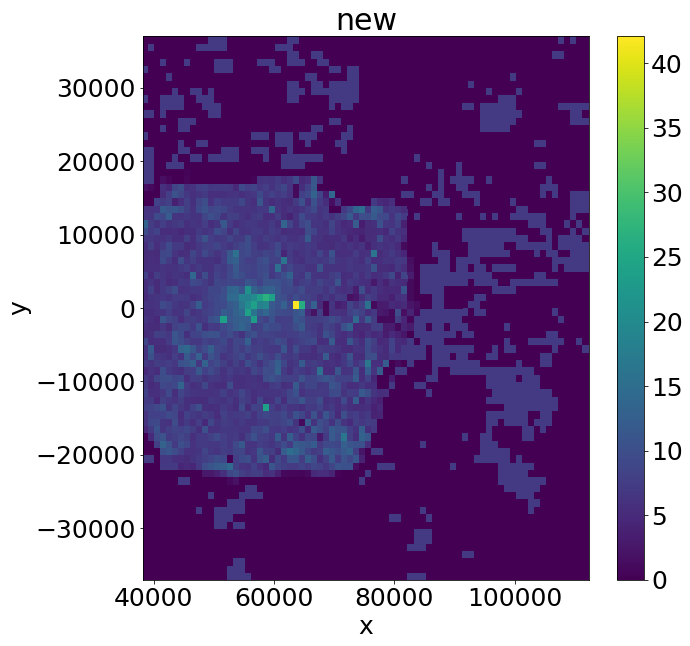

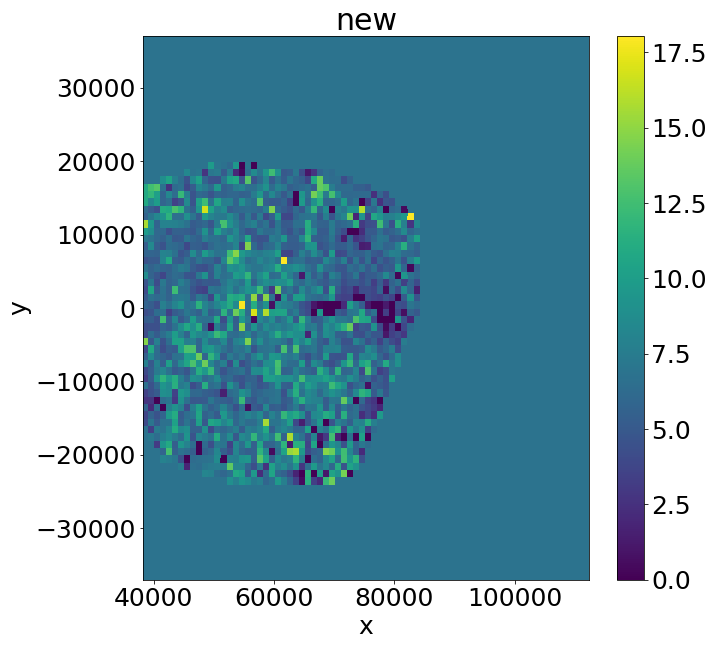

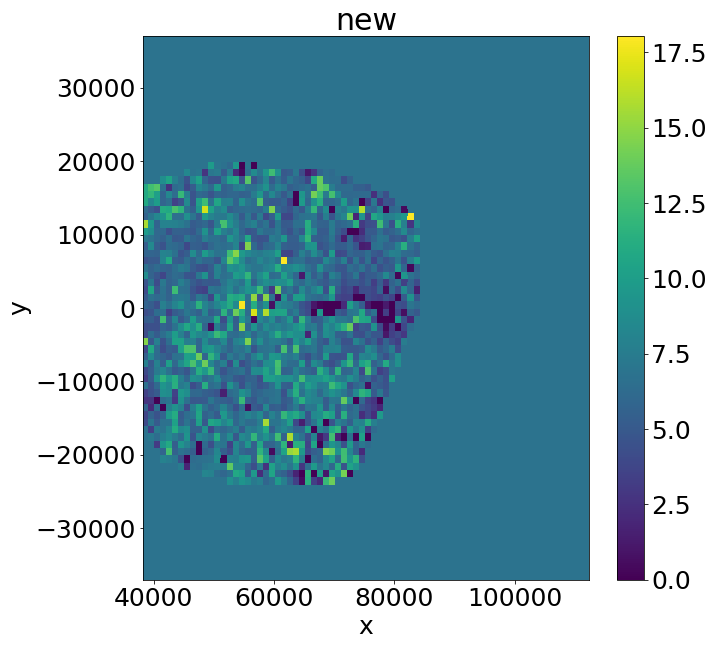

In [108]:
for name_wrf in names_wrf:
    pc_plot(wrf_X, wrf_Y,ds_base[name_wrf.upper()].values[0,:,:],'new')

In [109]:
# names=['PopDensNight','PopDensNight']
# names_wrf=['PopDensNightTime_SUEWS','PopDensDayTime_SUEWS']

# for name,name_wrf in zip(names,names_wrf):
#     print(name)
#     grid_x, grid_y,new_0=regrid_lower(name)
#     #new_all.update( {name : new_0} )
#     ds_var=ds_base[name_wrf.upper()].values[0,:,:]
#     ds_var[~np.isnan(new_0)]=new_0[~np.isnan(new_0)]
#     zz=ds_base[name_wrf.upper()].values[0,:,:]
#     zz[zz<0]=0
#     ds_base[name_wrf.upper()].values[0,:,:]=zz
# pc_plot(wrf_X, wrf_Y,ds_base['PopDensNightTime_SUEWS'.upper()].values[0,:,:],'new')

In [110]:
names=['Fr_Paved' ,'Fr_Bldgs' ,'Fr_EveTr' ,'Fr_DecTr' ,'Fr_Grass' ,'Fr_Bsoil','Fr_Water']
new_all={}
for name in names:
    print(name)
    grid_x, grid_y,new_0=regrid_lower(name)
    new_all[name]=new_0

Fr_Paved
Fr_Bldgs
Fr_EveTr
Fr_DecTr
Fr_Grass
Fr_Bsoil
Fr_Water


In [111]:
new_0=new_all['Fr_Paved']
cd=~np.isnan(new_0)
ds_base['LANDUSEF'].values[0,12,:,:][cd]=new_all['Fr_Paved'][cd]+new_all['Fr_Bldgs'][cd]

ds_base['LANDUSEF'].values[0,0,:,:][cd]=new_all['Fr_EveTr'][cd]/3
ds_base['LANDUSEF'].values[0,1,:,:][cd]=new_all['Fr_EveTr'][cd]/3
ds_base['LANDUSEF'].values[0,4,:,:][cd]=new_all['Fr_EveTr'][cd]/3

ds_base['LANDUSEF'].values[0,2,:,:][cd]=new_all['Fr_DecTr'][cd]/2
ds_base['LANDUSEF'].values[0,3,:,:][cd]=new_all['Fr_DecTr'][cd]/2

ds_base['LANDUSEF'].values[0,5,:,:][cd]=new_all['Fr_Grass'][cd]/7
ds_base['LANDUSEF'].values[0,6,:,:][cd]=new_all['Fr_Grass'][cd]/7
ds_base['LANDUSEF'].values[0,7,:,:][cd]=new_all['Fr_Grass'][cd]/7
ds_base['LANDUSEF'].values[0,8,:,:][cd]=new_all['Fr_Grass'][cd]/7
ds_base['LANDUSEF'].values[0,9,:,:][cd]=new_all['Fr_Grass'][cd]/7
ds_base['LANDUSEF'].values[0,11,:,:][cd]=new_all['Fr_Grass'][cd]/7
ds_base['LANDUSEF'].values[0,13,:,:][cd]=new_all['Fr_Grass'][cd]/7

ds_base['LANDUSEF'].values[0,15,:,:][cd]=new_all['Fr_Bsoil'][cd]/4
ds_base['LANDUSEF'].values[0,17,:,:][cd]=new_all['Fr_Bsoil'][cd]/4
ds_base['LANDUSEF'].values[0,18,:,:][cd]=new_all['Fr_Bsoil'][cd]/4
ds_base['LANDUSEF'].values[0,19,:,:][cd]=new_all['Fr_Bsoil'][cd]/4


ds_base['LANDUSEF'].values[0,10,:,:][cd]=new_all['Fr_Water'][cd]/2
ds_base['LANDUSEF'].values[0,16,:,:][cd]=new_all['Fr_Water'][cd]/2

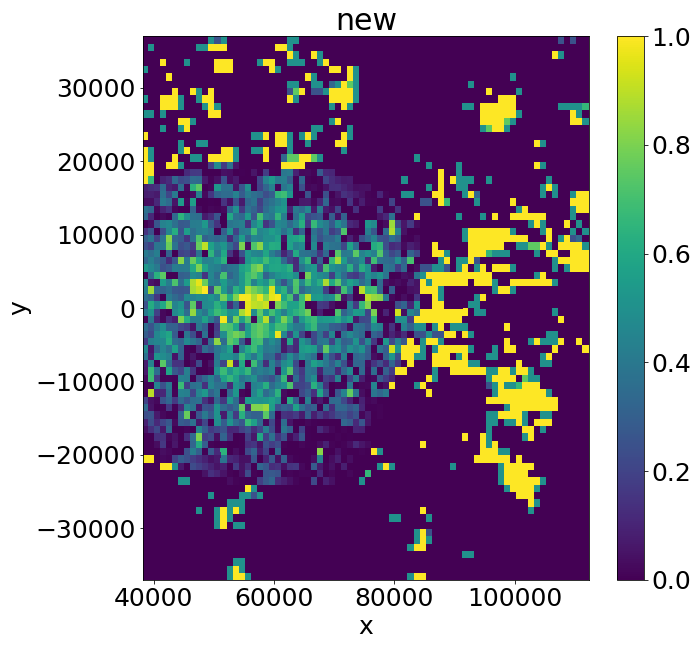

In [112]:
pc_plot(wrf_X, wrf_Y,ds_base['LANDUSEF'].values[0,12,:,:],'new')

In [113]:
shapefile2 = gpd.read_file("ESRI1/OAres_work_pop.shp")
p2_text='''ESRI:102009 +proj=lcc +lat_1=30 +lat_2=60 +lat_0=51.51 +lon_0=-0.96 
+x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +no_defs +towgs84=0,0,0
'''
shapefile_converted=shapefile2.to_crs({'init': p2_text})
shapefile_converted['Res_dens']=shapefile_converted['ResPop']/(shapefile_converted['Area']/10000)
shapefile_converted['Work_dens']=shapefile_converted['WorkPop']/(shapefile_converted['Area']/10000)

/anaconda3/envs/fiona_problem/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


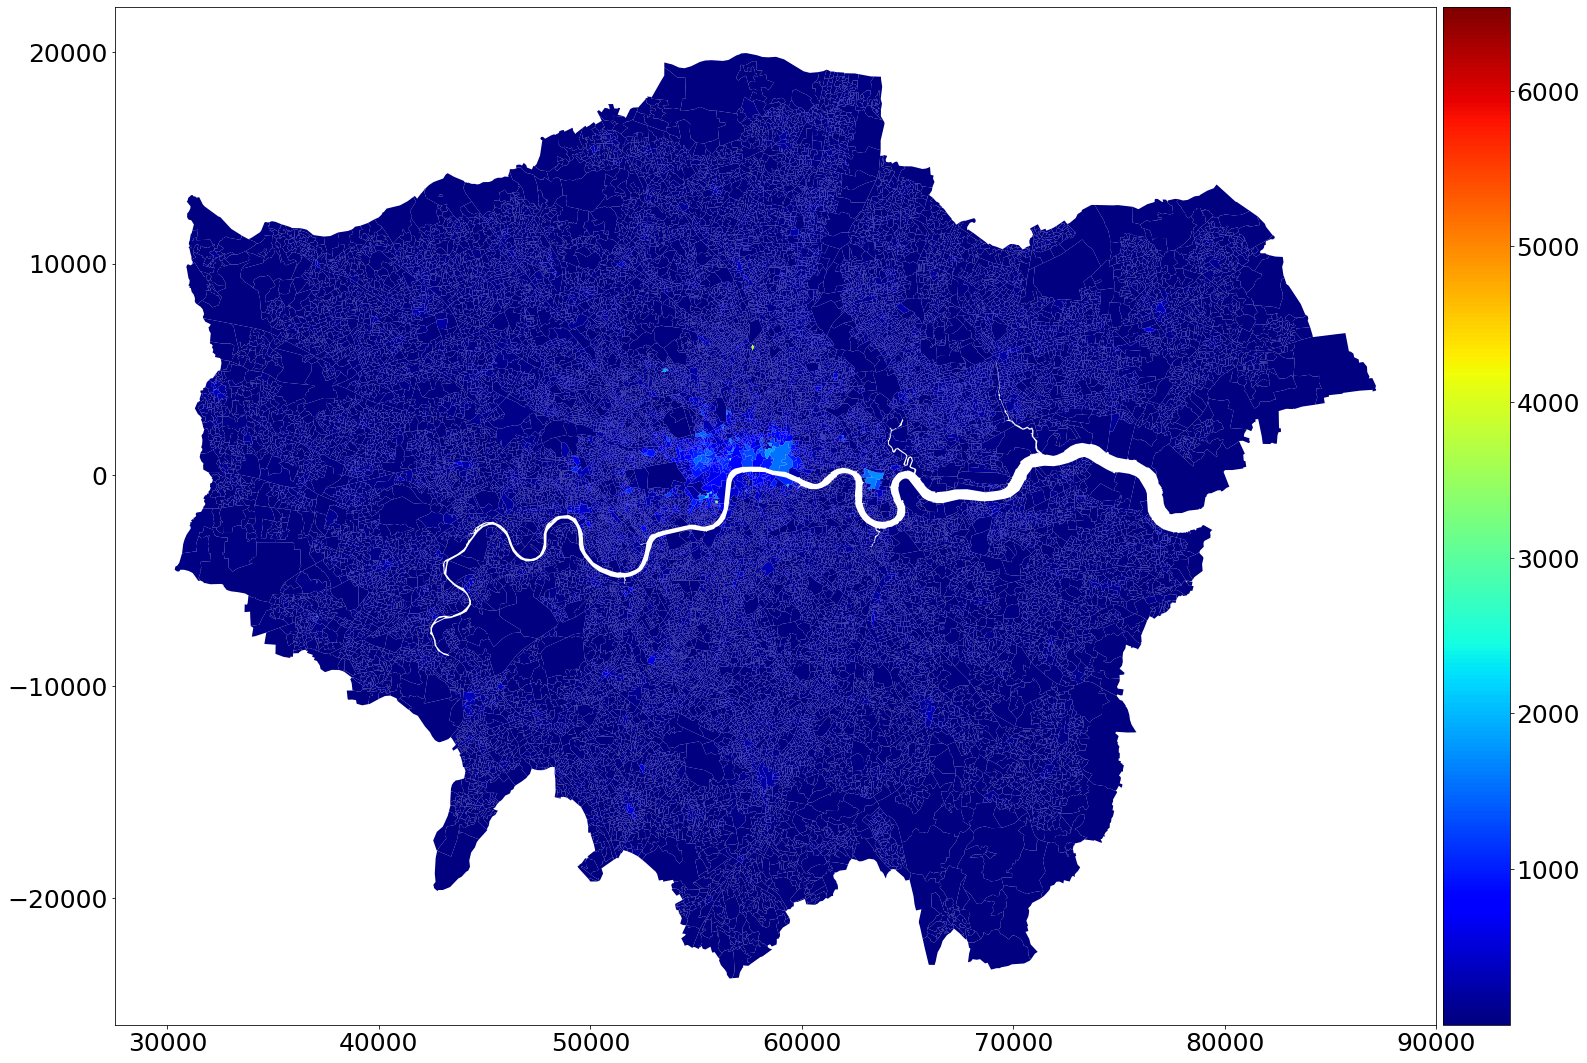

In [114]:
fig, ax = plt.subplots(1, 1,figsize=(25,25))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
shapefile_converted_2=shapefile_converted.copy()
shapefile_converted_2.loc[shapefile_converted_2[shapefile_converted_2['Work_dens']>17000].index,'Work_dens']=np.nan
shapefile_converted_2.loc[shapefile_converted_2[shapefile_converted_2['Res_dens']>17000].index,'Res_dens']=np.nan

shapefile_converted_2.plot('Work_dens',cmap='jet',ax=ax,
               legend=True, cax=cax)
plt.savefig('popdens.png',pdi=500)

In [115]:
shapefile_converted[shapefile_converted.Work_dens==shapefile_converted.Work_dens.max()]

,ID,LSOA11CD,MSOA11CD,Area,WorkPop,ResPop,geometry,Res_dens,Work_dens
25051,E00014344,E01002862,E02000590,191,331,437,POLYGON ((53447.23082508645 -1637.677372718392...,22879.581152,17329.842932


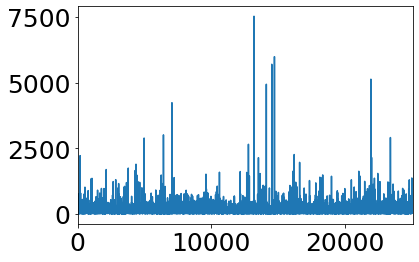

In [116]:
shapefile_converted_2.Res_dens.plot()

In [117]:
def regrid_lower_2(name,z1,x1,y1,wrf_X,wrf_Y):
    Z=z1
    grid_x=wrf_X
    grid_y=wrf_Y
    new_Z=griddata(list(zip(x1,y1)), Z, (grid_x, grid_y),method='linear')
    #pc_plot(grid_x, grid_y,new_Z,name)
    return grid_x, grid_y,new_Z

In [135]:
x1=shapefile_converted_2.iloc[:]['geometry'].centroid.x
y1=shapefile_converted_2.iloc[:]['geometry'].centroid.y
names=['Work_dens','Res_dens']
names_wrf=['PopDensDayTime_SUEWS','PopDensNightTime_SUEWS']
for name,name_wrf in zip(names,names_wrf):
    print(name)
    z1=shapefile_converted_2[name]
    grid_x, grid_y,new_0=regrid_lower_2('',z1,x1,y1,wrf_X,wrf_Y)
    xx=np.where(new_0==new_0[~np.isnan(new_0)].max())[0]
    yy=np.where(new_0==new_0[~np.isnan(new_0)].max())[1]
    new_0[new_0==new_0[~np.isnan(new_0)].max()]=(new_0[xx+1,yy]+new_0[xx-1,yy]+new_0[xx,yy+1]+new_0[xx,yy-1])/4
    ds_var=ds_base[name_wrf.upper()].values[0,:,:]
    ds_var[~np.isnan(new_0)]=new_0[~np.isnan(new_0)]
    #ds_var[np.isnan(new_0)]=0
    zz=ds_base[name_wrf.upper()].values[0,:,:]
    zz[zz<0]=0
    zz[np.isnan(new_0) & (zz!=0)]=np.percentile(zz[~np.isnan(new_0)],50)
    ds_base[name_wrf.upper()].values[0,:,:]=zz

Work_dens
Res_dens


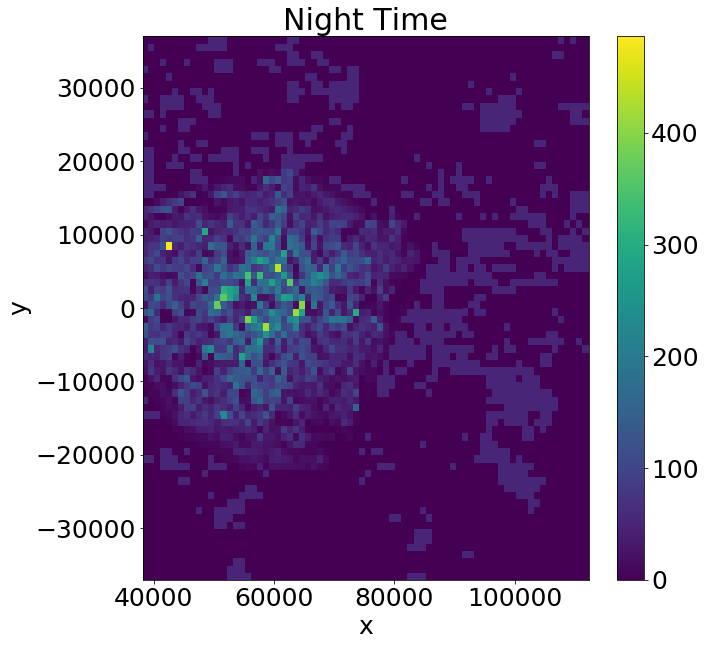

In [136]:
pc_plot(wrf_X, wrf_Y,ds_base['PopDensNightTime_SUEWS'.upper()].values[0,:,:],'Night Time')

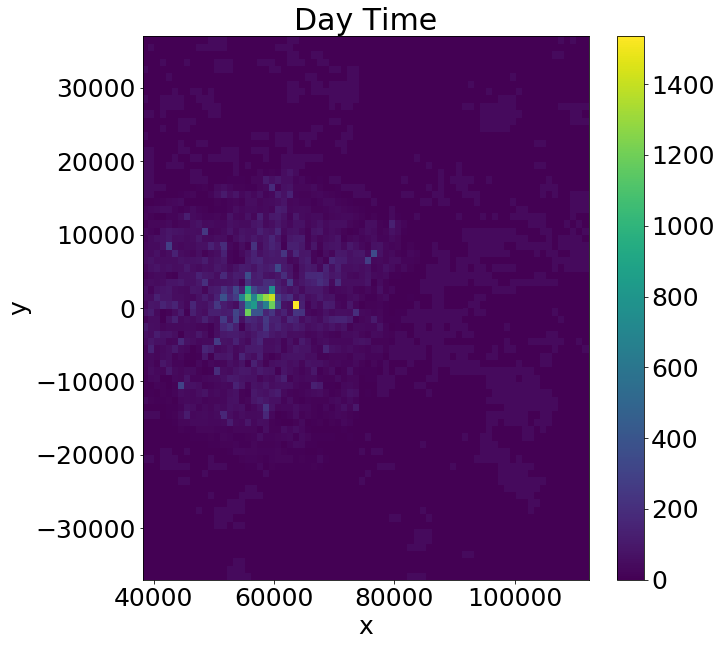

In [137]:
pc_plot(wrf_X, wrf_Y,ds_base['PopDensDayTime_SUEWS'.upper()].values[0,:,:],'Day Time')

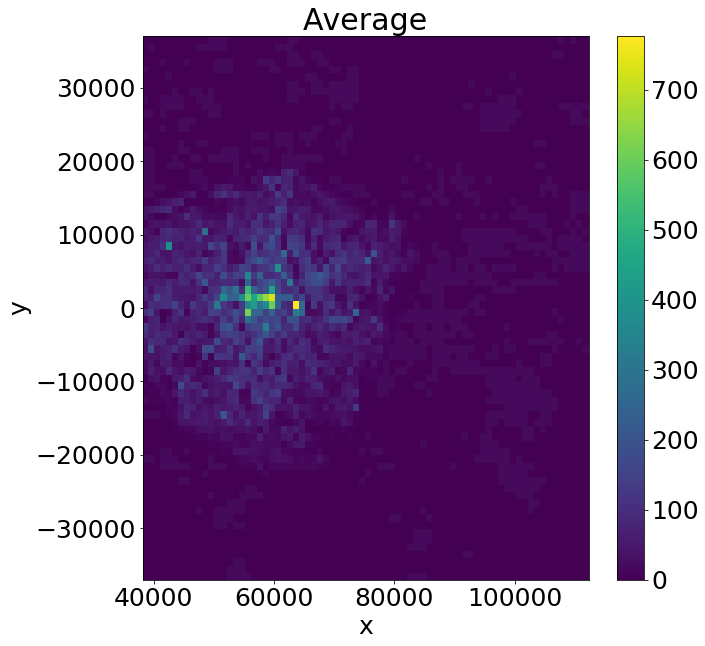

In [121]:
zz=(ds_base['PopDensDayTime_SUEWS'.upper()].values[0,:,:]+ds_base['PopDensNightTime_SUEWS'.upper()].values[0,:,:])/2
pc_plot(wrf_X, wrf_Y,zz,'Average')

In [122]:
def pc_plot_2(grid_x, grid_y,new_Z,name,ax):
    #plt.figure(figsize=(10,10))
    c=ax.pcolor(grid_x, grid_y,new_Z)
    #plt.colorbar()
    #plt.title(name)
    #plt.ylabel('y')
    #plt.xlabel('x')
    return c

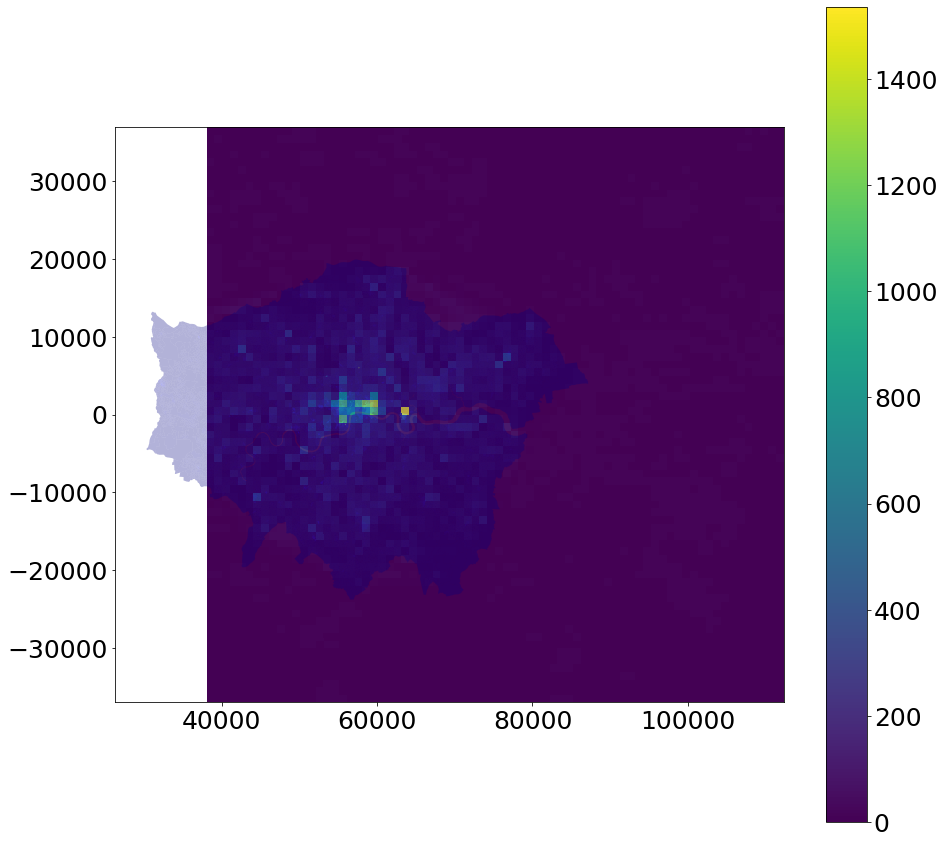

In [123]:
fig, ax = plt.subplots(1, 1,figsize=(15,15))
plt.rc('font', size=25)
c=pc_plot_2(wrf_X, wrf_Y,ds_base['PopDensDayTime_SUEWS'.upper()].values[0,:,:],'new',ax)
shapefile_converted_2.plot('Work_dens',cmap='jet',ax=ax,alpha=0.3,
               legend=False)
fig.colorbar(c, ax=ax)
plt.savefig('Day.png',dpi=400)

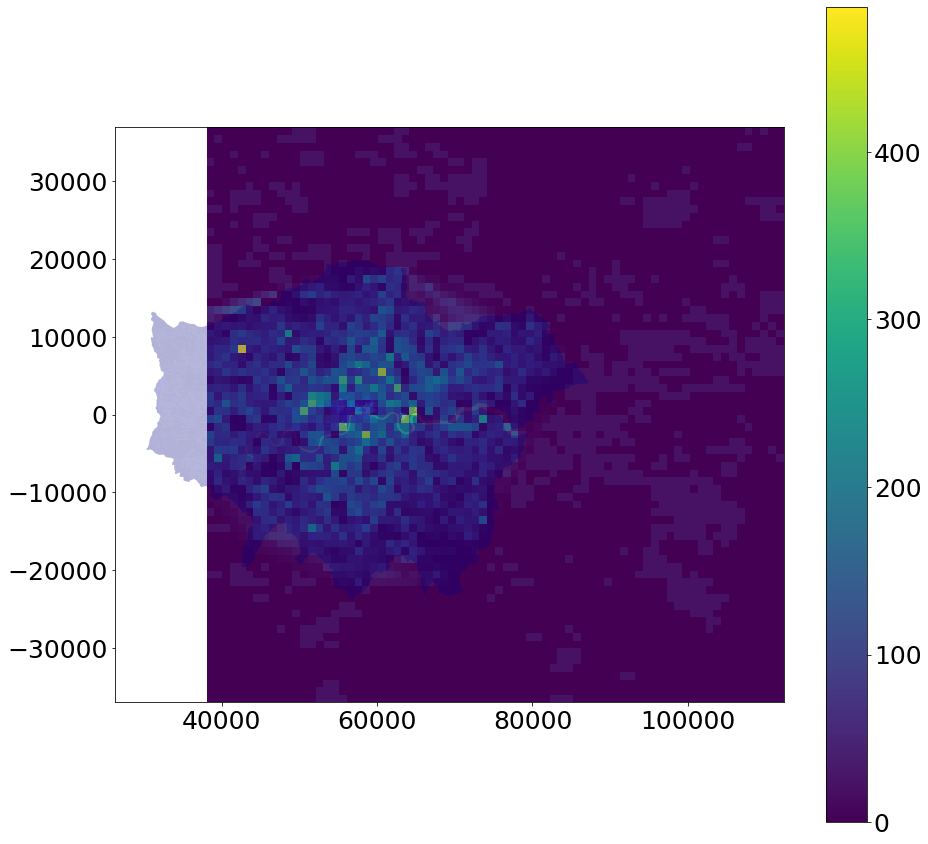

In [124]:
fig, ax = plt.subplots(1, 1,figsize=(15,15))
plt.rc('font', size=25)
c=pc_plot_2(wrf_X, wrf_Y,ds_base['PopDensNightTime_SUEWS'.upper()].values[0,:,:],'new',ax)
shapefile_converted_2.plot('Work_dens',cmap='jet',ax=ax,alpha=0.3,
               legend=False)
fig.colorbar(c, ax=ax)
plt.savefig('Night.png',dpi=400)

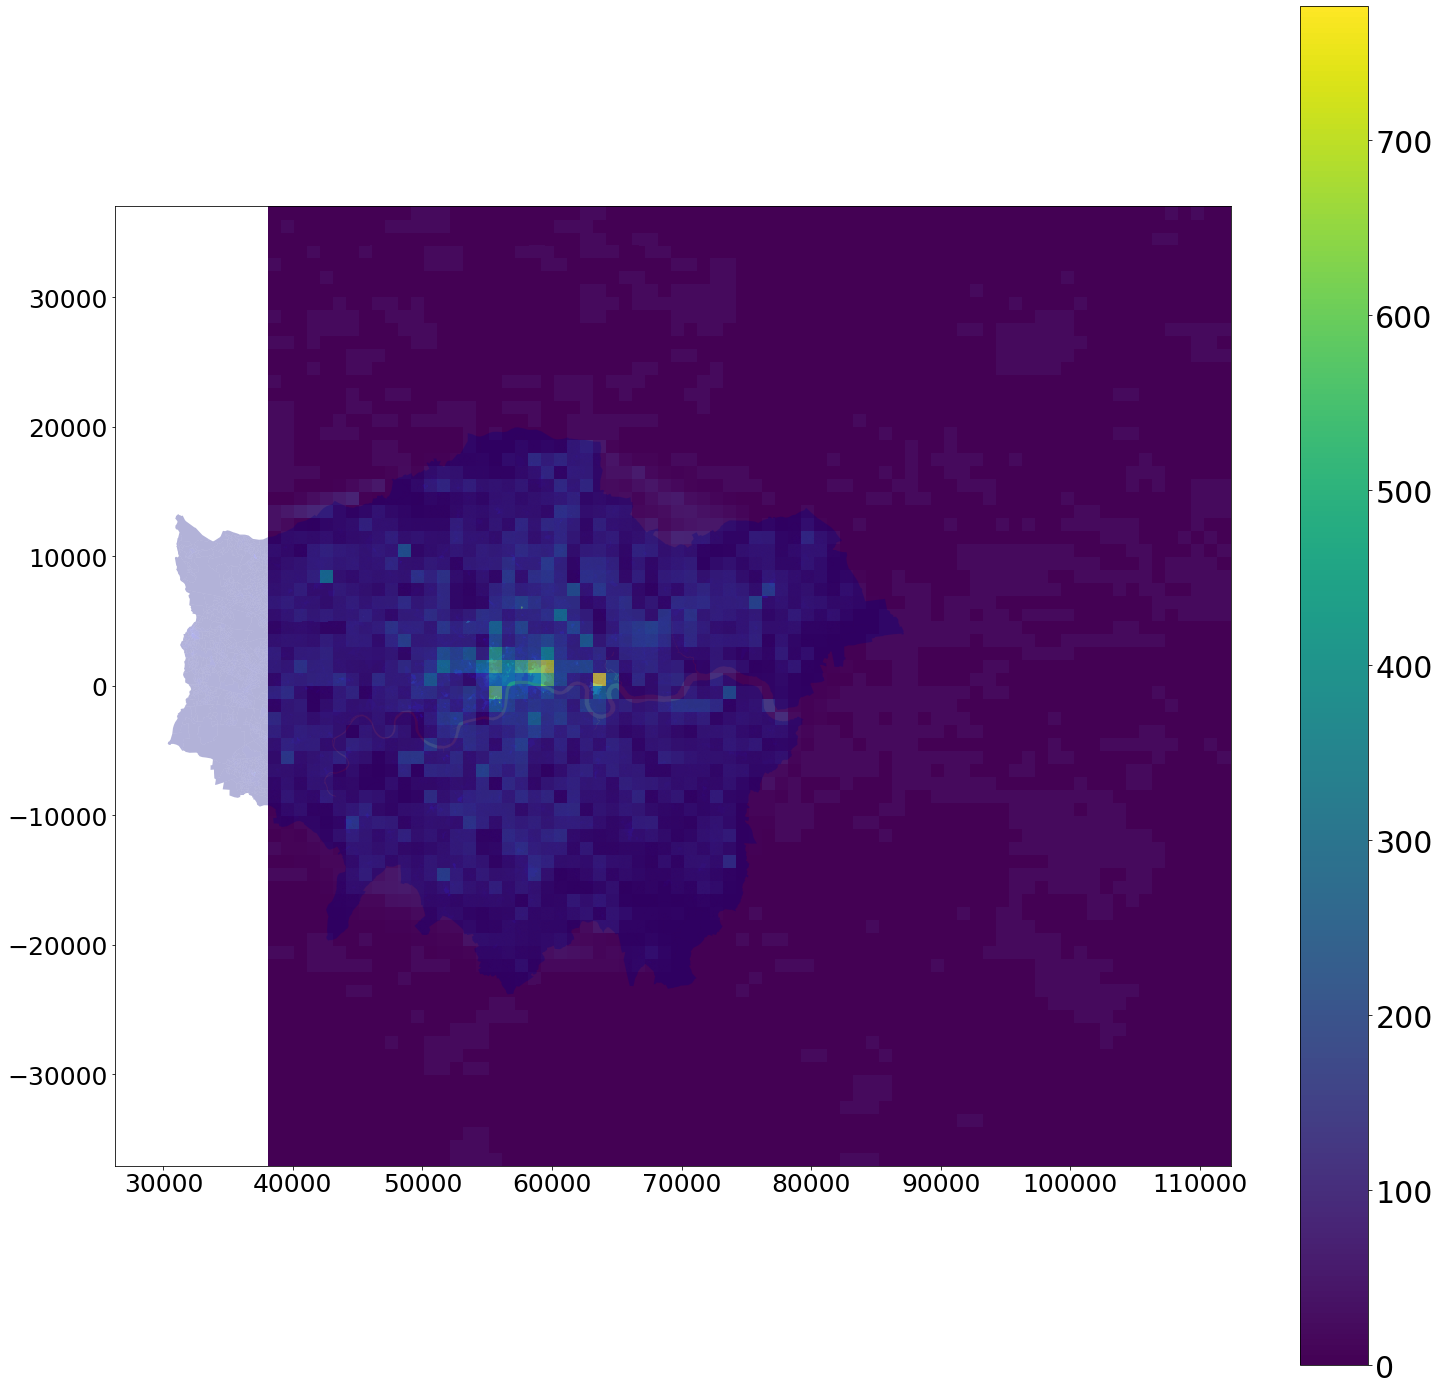

In [125]:
fig, ax = plt.subplots(1, 1,figsize=(25,25))
plt.rc('font', size=30)
c=pc_plot_2(wrf_X, wrf_Y,zz,'new',ax)
shapefile_converted_2.plot('Work_dens',cmap='jet',ax=ax,alpha=0.3,
               legend=False)
fig.colorbar(c, ax=ax)
plt.savefig('Avg.png',dpi=400)

qf_a_suews
qf_b_suews
qf_c_suews


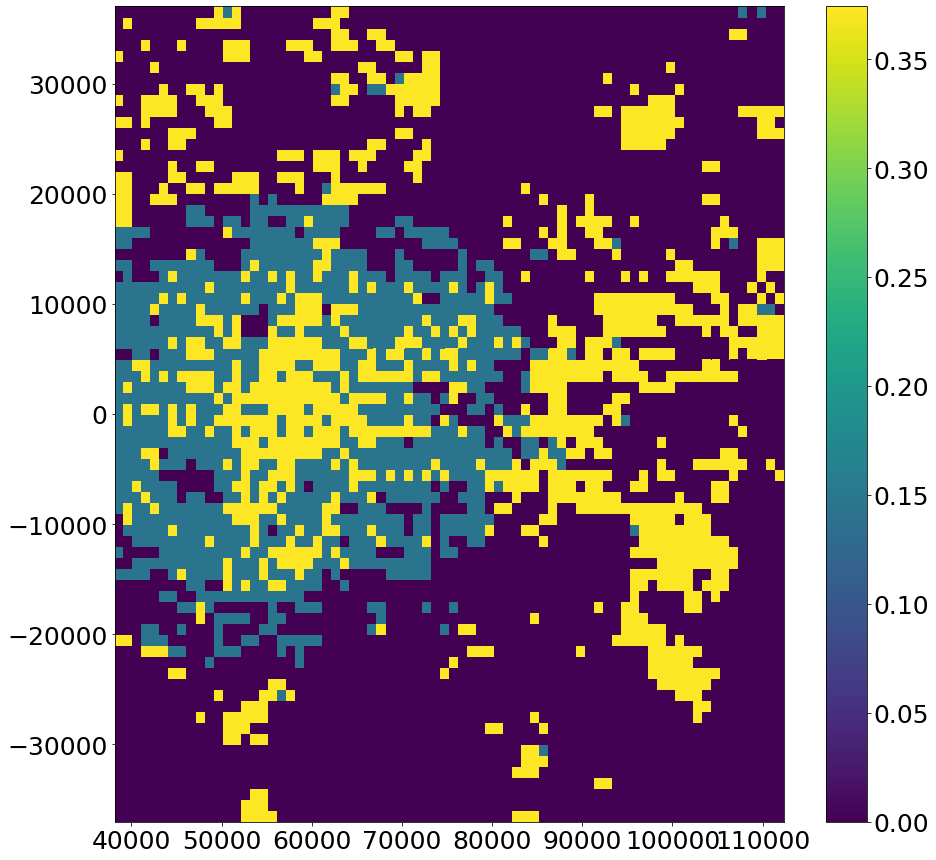

In [133]:
w1s=[0.1446,0,0.0037]
w2s=[0.133,0,0.0038]
qs=['qf_a_suews','qf_b_suews','qf_c_suews']
dtemp=ds_base.copy()
zz=dtemp['landusef'.upper()].values[0,12,:,:]

for q,w1,w2 in zip(qs,w1s,w2s):
    
    print(q)
    qa=dtemp[q.upper()].values[0,0,:,:]
    qa[(zz<=0.49) & (qa!=0)]=w1
    dtemp[q.upper()].values[0,0,:,:]=qa
    
    qa=dtemp[q.upper()].values[0,1,:,:]
    qa[(zz<=0.49) & (qa!=0)]=w2
    dtemp[q.upper()].values[0,1,:,:]=qa
    
ds_base=dtemp    
    
fig, ax = plt.subplots(1, 1,figsize=(15,15))
plt.rc('font', size=25)
c=pc_plot_2(wrf_X, wrf_Y,ds_base['qf_a_suews'.upper()].values[0,0,:,:],'',ax)
fig.colorbar(c, ax=ax)


In [138]:
ds_merged = ds_base.update(ds_base)    

for var in ds_merged.data_vars.keys():
    if 'coordinates' in ds_merged[var].attrs:
        del ds_merged[var].attrs['coordinates']
        
file_out = x_file+'.new'

ds_merged.to_netcdf(file_out,
                    mode='w', format='NETCDF3_64BIT')
print('SUEWS input has been added to:' + file_out)

SUEWS input has been added to:wrfinput_d03.suews.new
